In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [46]:
df = pd.read_csv('../data/heart.csv')

In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
df.shape

(303, 14)

In [47]:
#Sua ten cot du lieu
df.rename(columns={'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol':'cholesterol', \
                   'fbs':'fasting_blood_sugar', 'restecg':'rest_ecg', 'thalach':'max_heart_rate_achieved', \
                   'exang':'exercise_induced_angina', 'oldpeak':'st_depression', 'slope':'st_slope', \
                  'ca':'num_major_vessels', 'thal':'thalassemia'}, inplace=True)

In [9]:
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.3         0                  0   
1                        0            3.5         0                  0   
2                        0            1.4         2                  0   
3                        0            0.8         2                  0   
4                        1            0.6         2                  0   

   thalassemia  target  
0            1       1  
1            2       1  
2            2       1  
3            2       1  
4            2       1

In [11]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

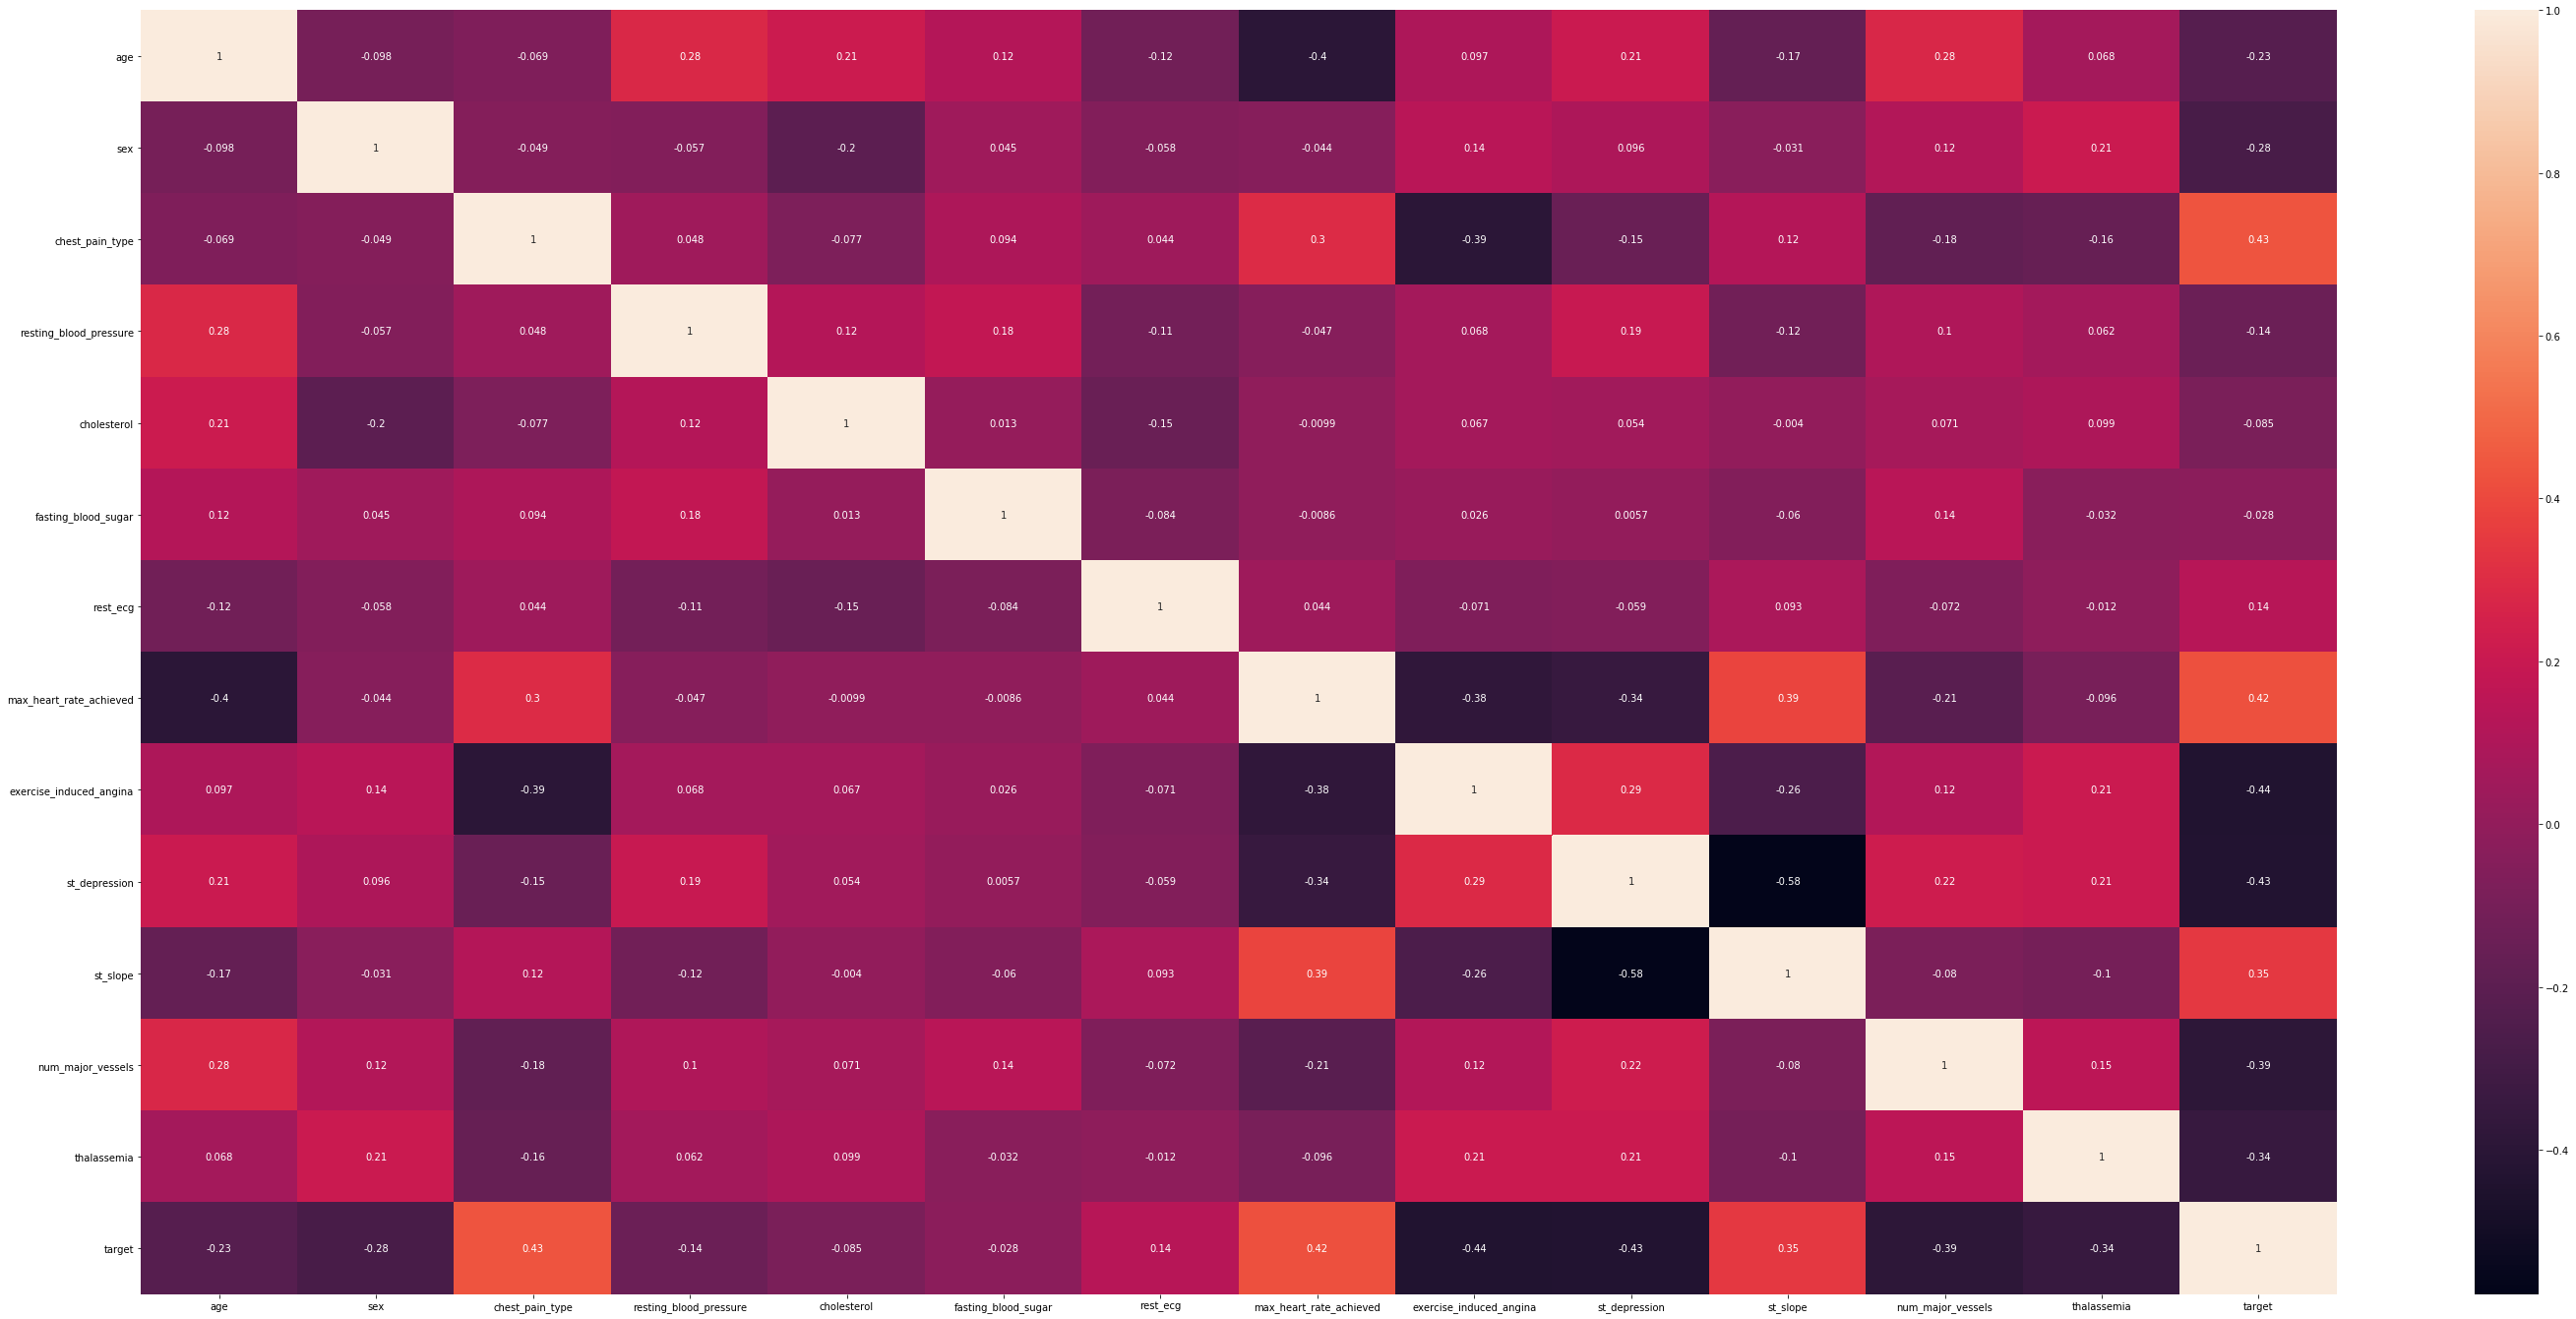

In [13]:
plt.figure(figsize=(50,24))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.savefig('heart.png')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [48]:
# xóa thuộc tính st_slope để loại bỏ sự tương quan của nó với max_heart_rate_achieved
df.drop(['st_slope'], axis=1, inplace=True)

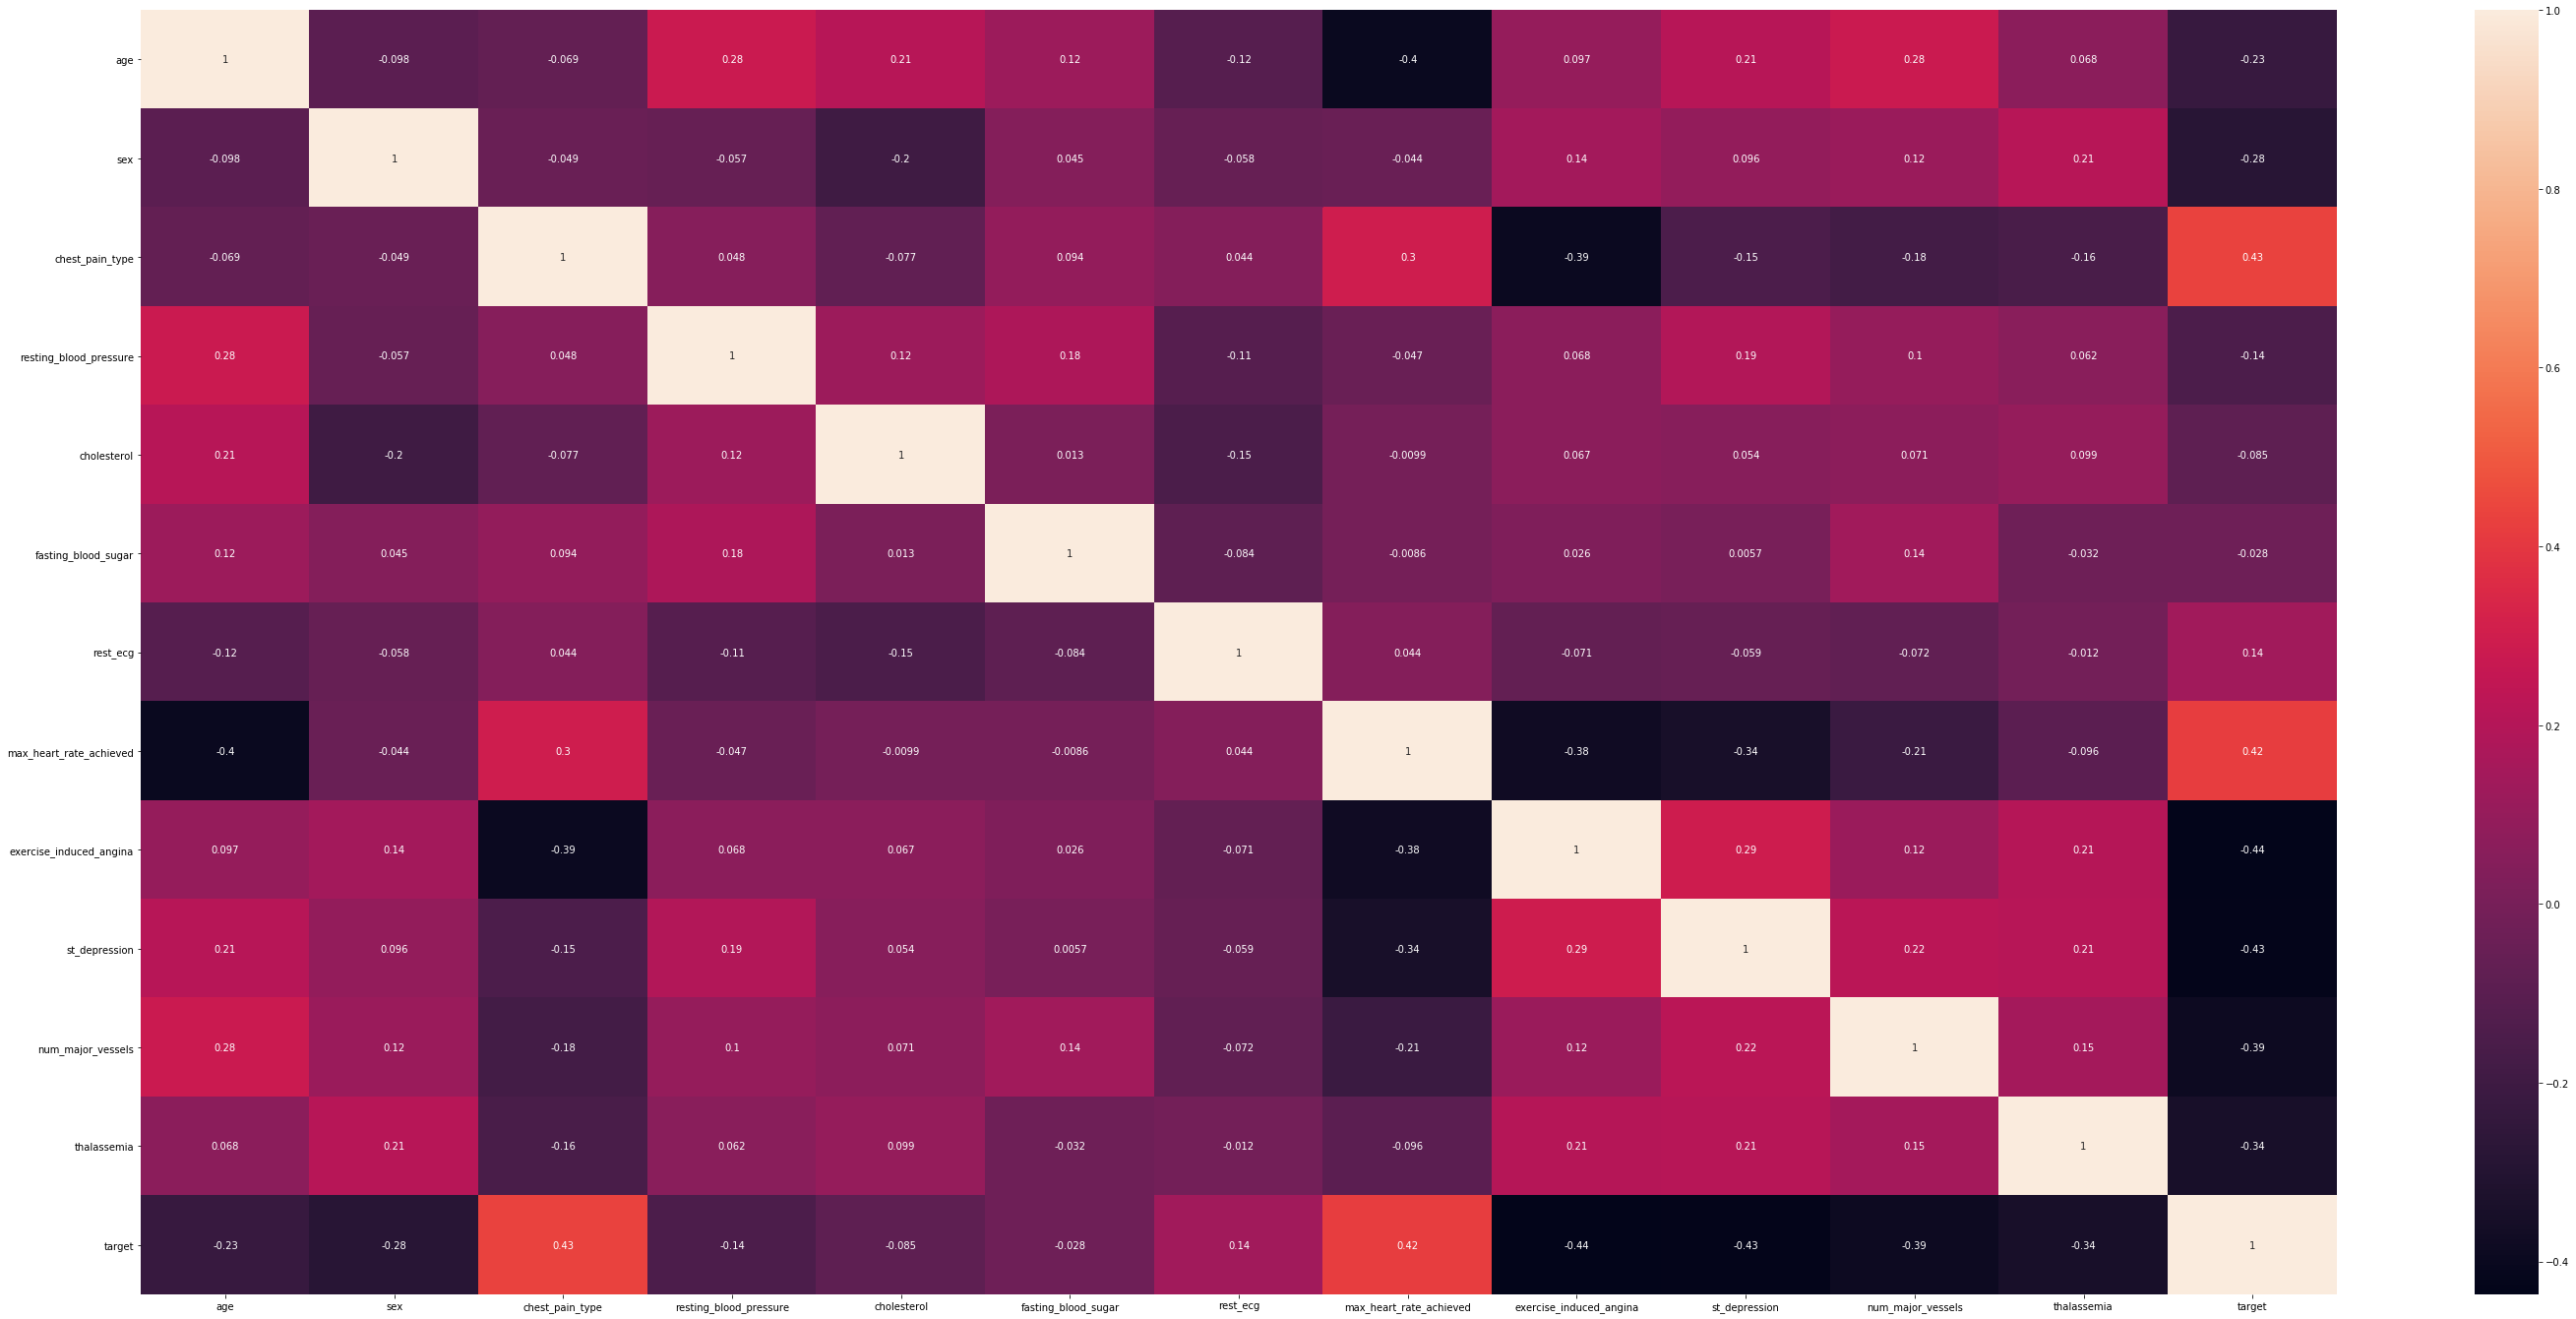

In [49]:
plt.figure(figsize=(50,24))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.savefig('heart.png')

In [50]:
# lấy những biến độc lập
X = df.drop('target', axis=1)

In [51]:
# lấy biến phụ thuộc
y = df['target']

In [52]:
#chia dữ liệu thành 2 phần train và test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [53]:
#Tạo cây ID3
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [54]:
#Train mô hình và dự báo trên tập test
tree_pred = clf.fit(X_train, y_train).predict(X_test)

In [55]:
#tính độ chính xác của mô hình bằng độ đo accuracy
tree_score = metrics.accuracy_score(y_test, tree_pred)

In [56]:
print('Accuracy: ', tree_score)
print('Report: ', metrics.classification_report(y_test, tree_pred))

Accuracy:  0.7912087912087912
Report:                precision    recall  f1-score   support

           0       0.82      0.73      0.77        44
           1       0.77      0.85      0.81        47

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [23]:
# tạo ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

In [71]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1, 'Decision Tree Accuracy Score: 0.7802197802197802')

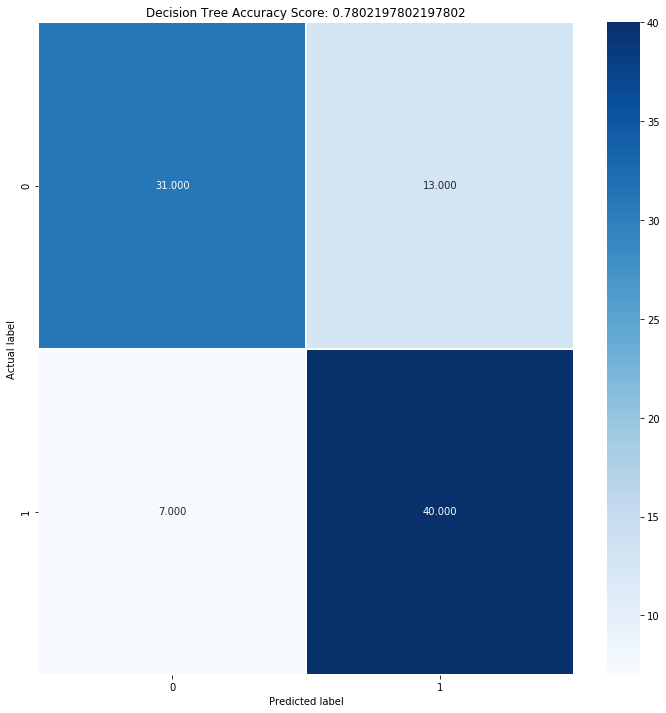

In [25]:
#biểu diễn ma trận nhầm lẫn
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, linewidths=1, fmt='.3f', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title)

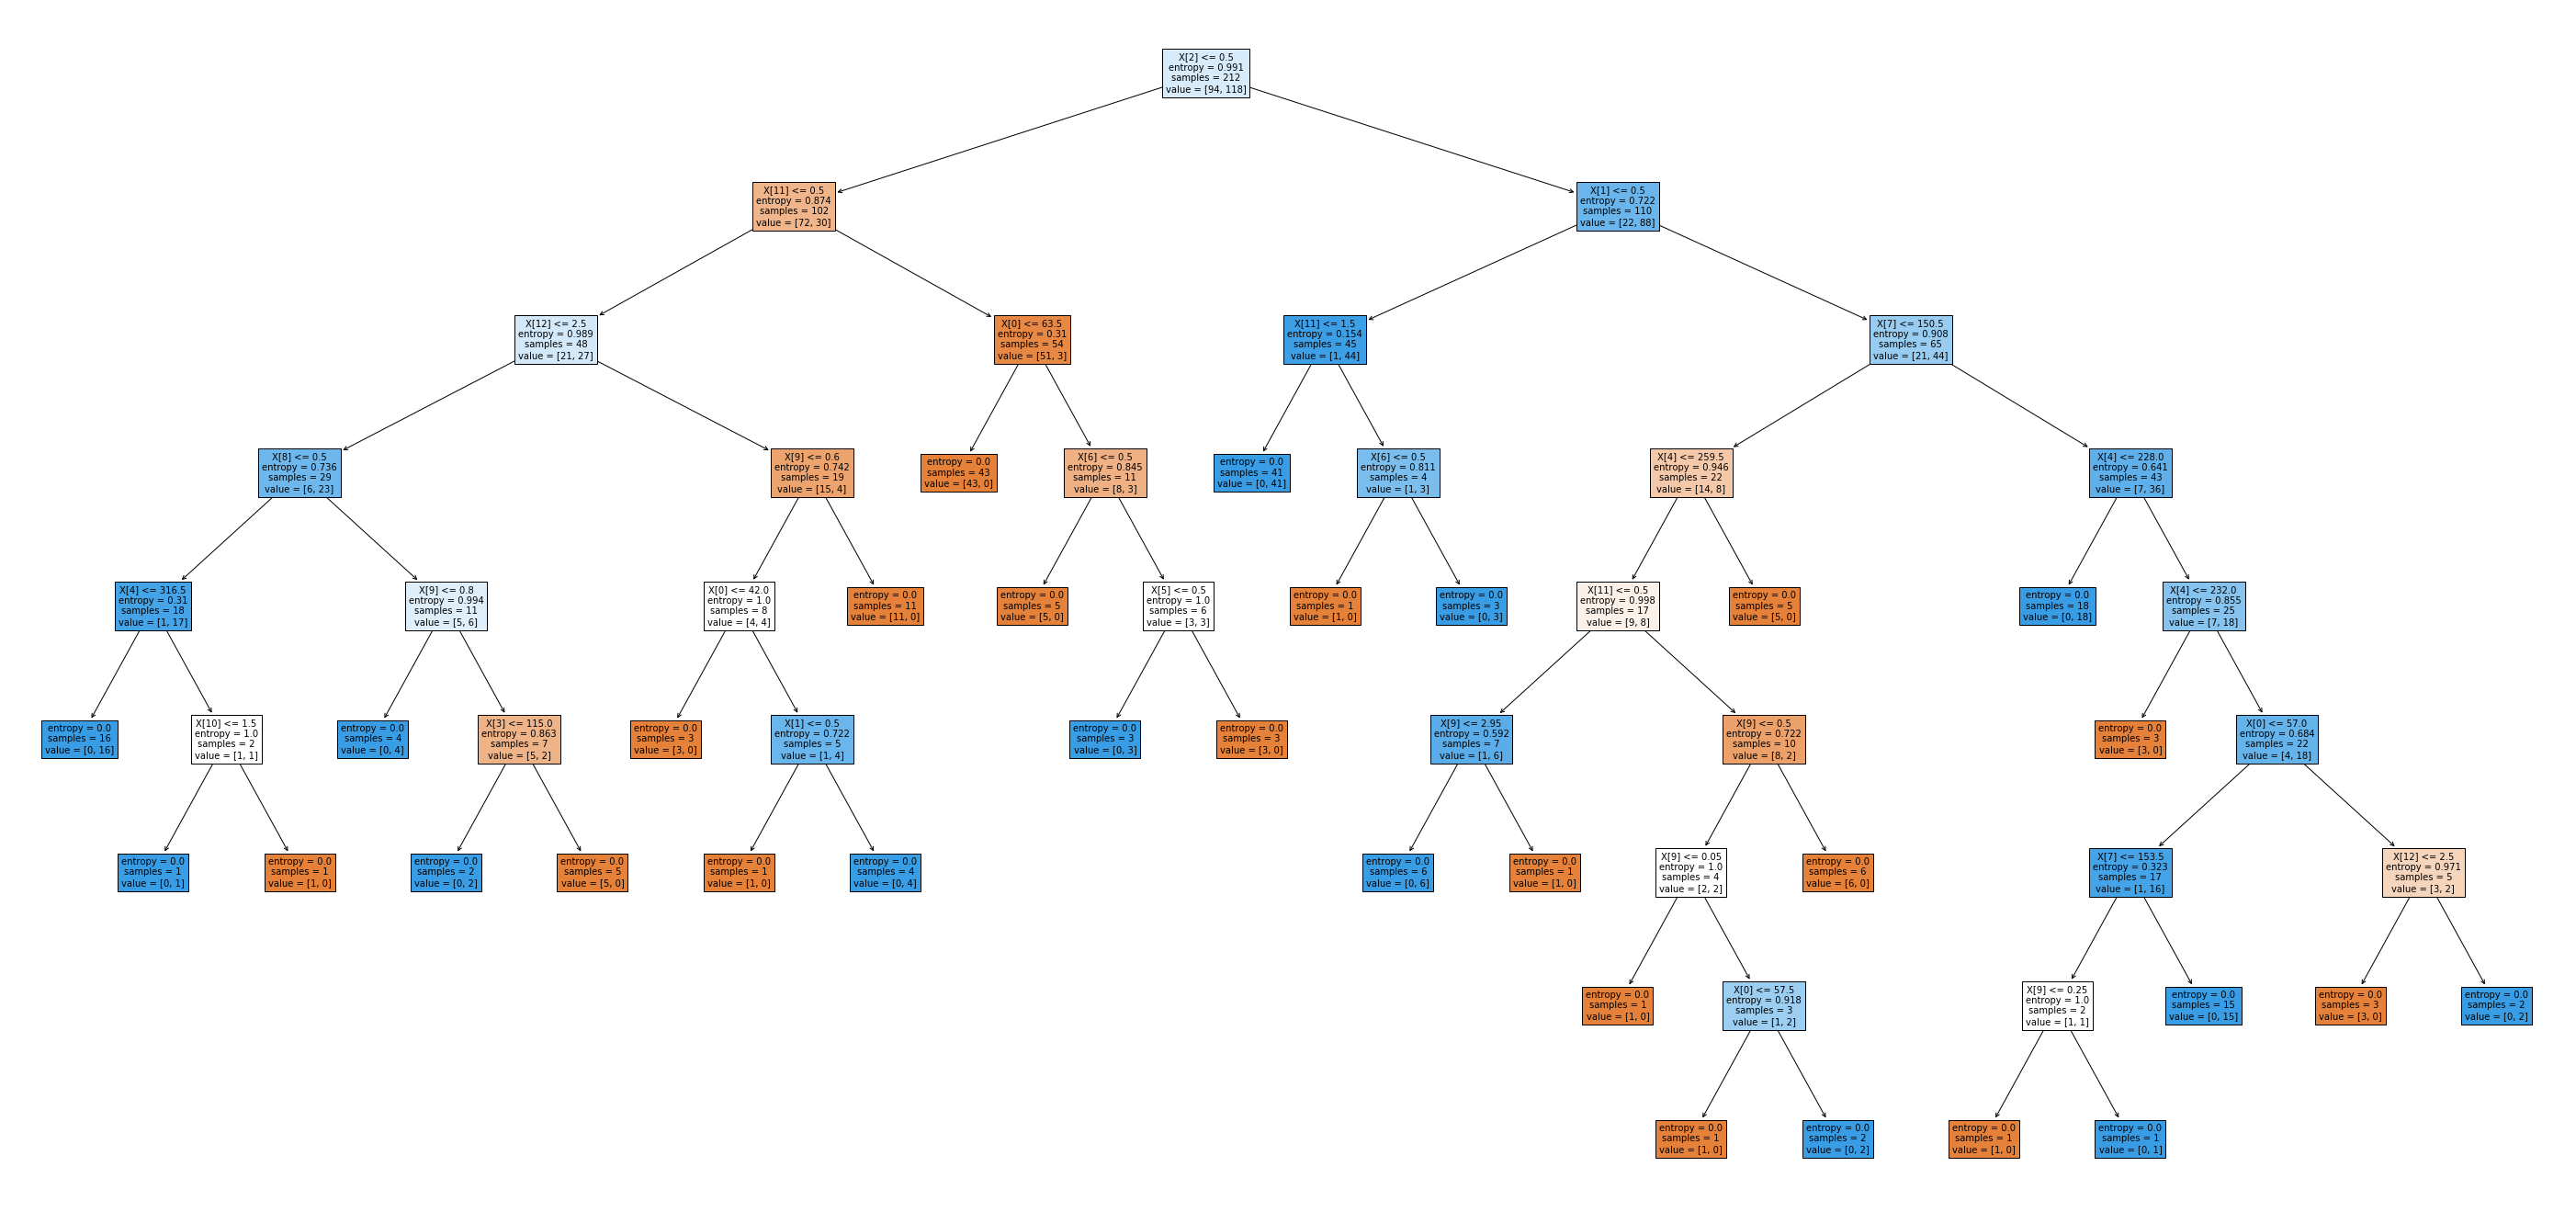

In [28]:
#Vẽ cây ID3
plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

In [96]:
#Tạo cây CART
clf = tree.DecisionTreeClassifier(criterion='gini')

In [97]:
tree_pred = clf.fit(X_train, y_train).predict(X_test)

In [98]:
tree_score = metrics.accuracy_score(y_test, tree_pred)

In [99]:
print('Accuracy: ', tree_score)
print('Report: ', metrics.classification_report(y_test, tree_pred))

Accuracy:  0.7472527472527473
Report:                precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.74      0.79      0.76        47

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [100]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1, 'Decision Tree Accuracy Score: 0.7362637362637363')

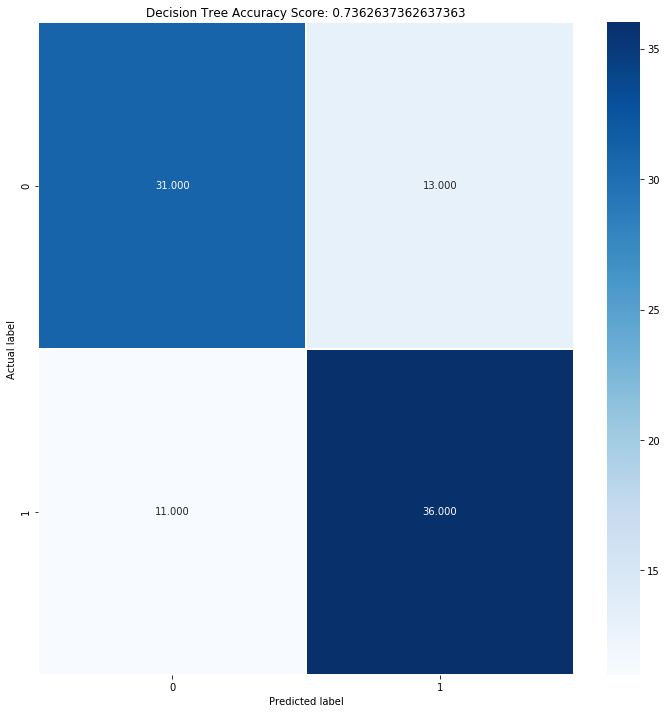

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, linewidths=1, fmt='.3f', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title)

In [103]:
y_train

137    1
106    1
284    0
44     1
139    1
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 212, dtype: int64

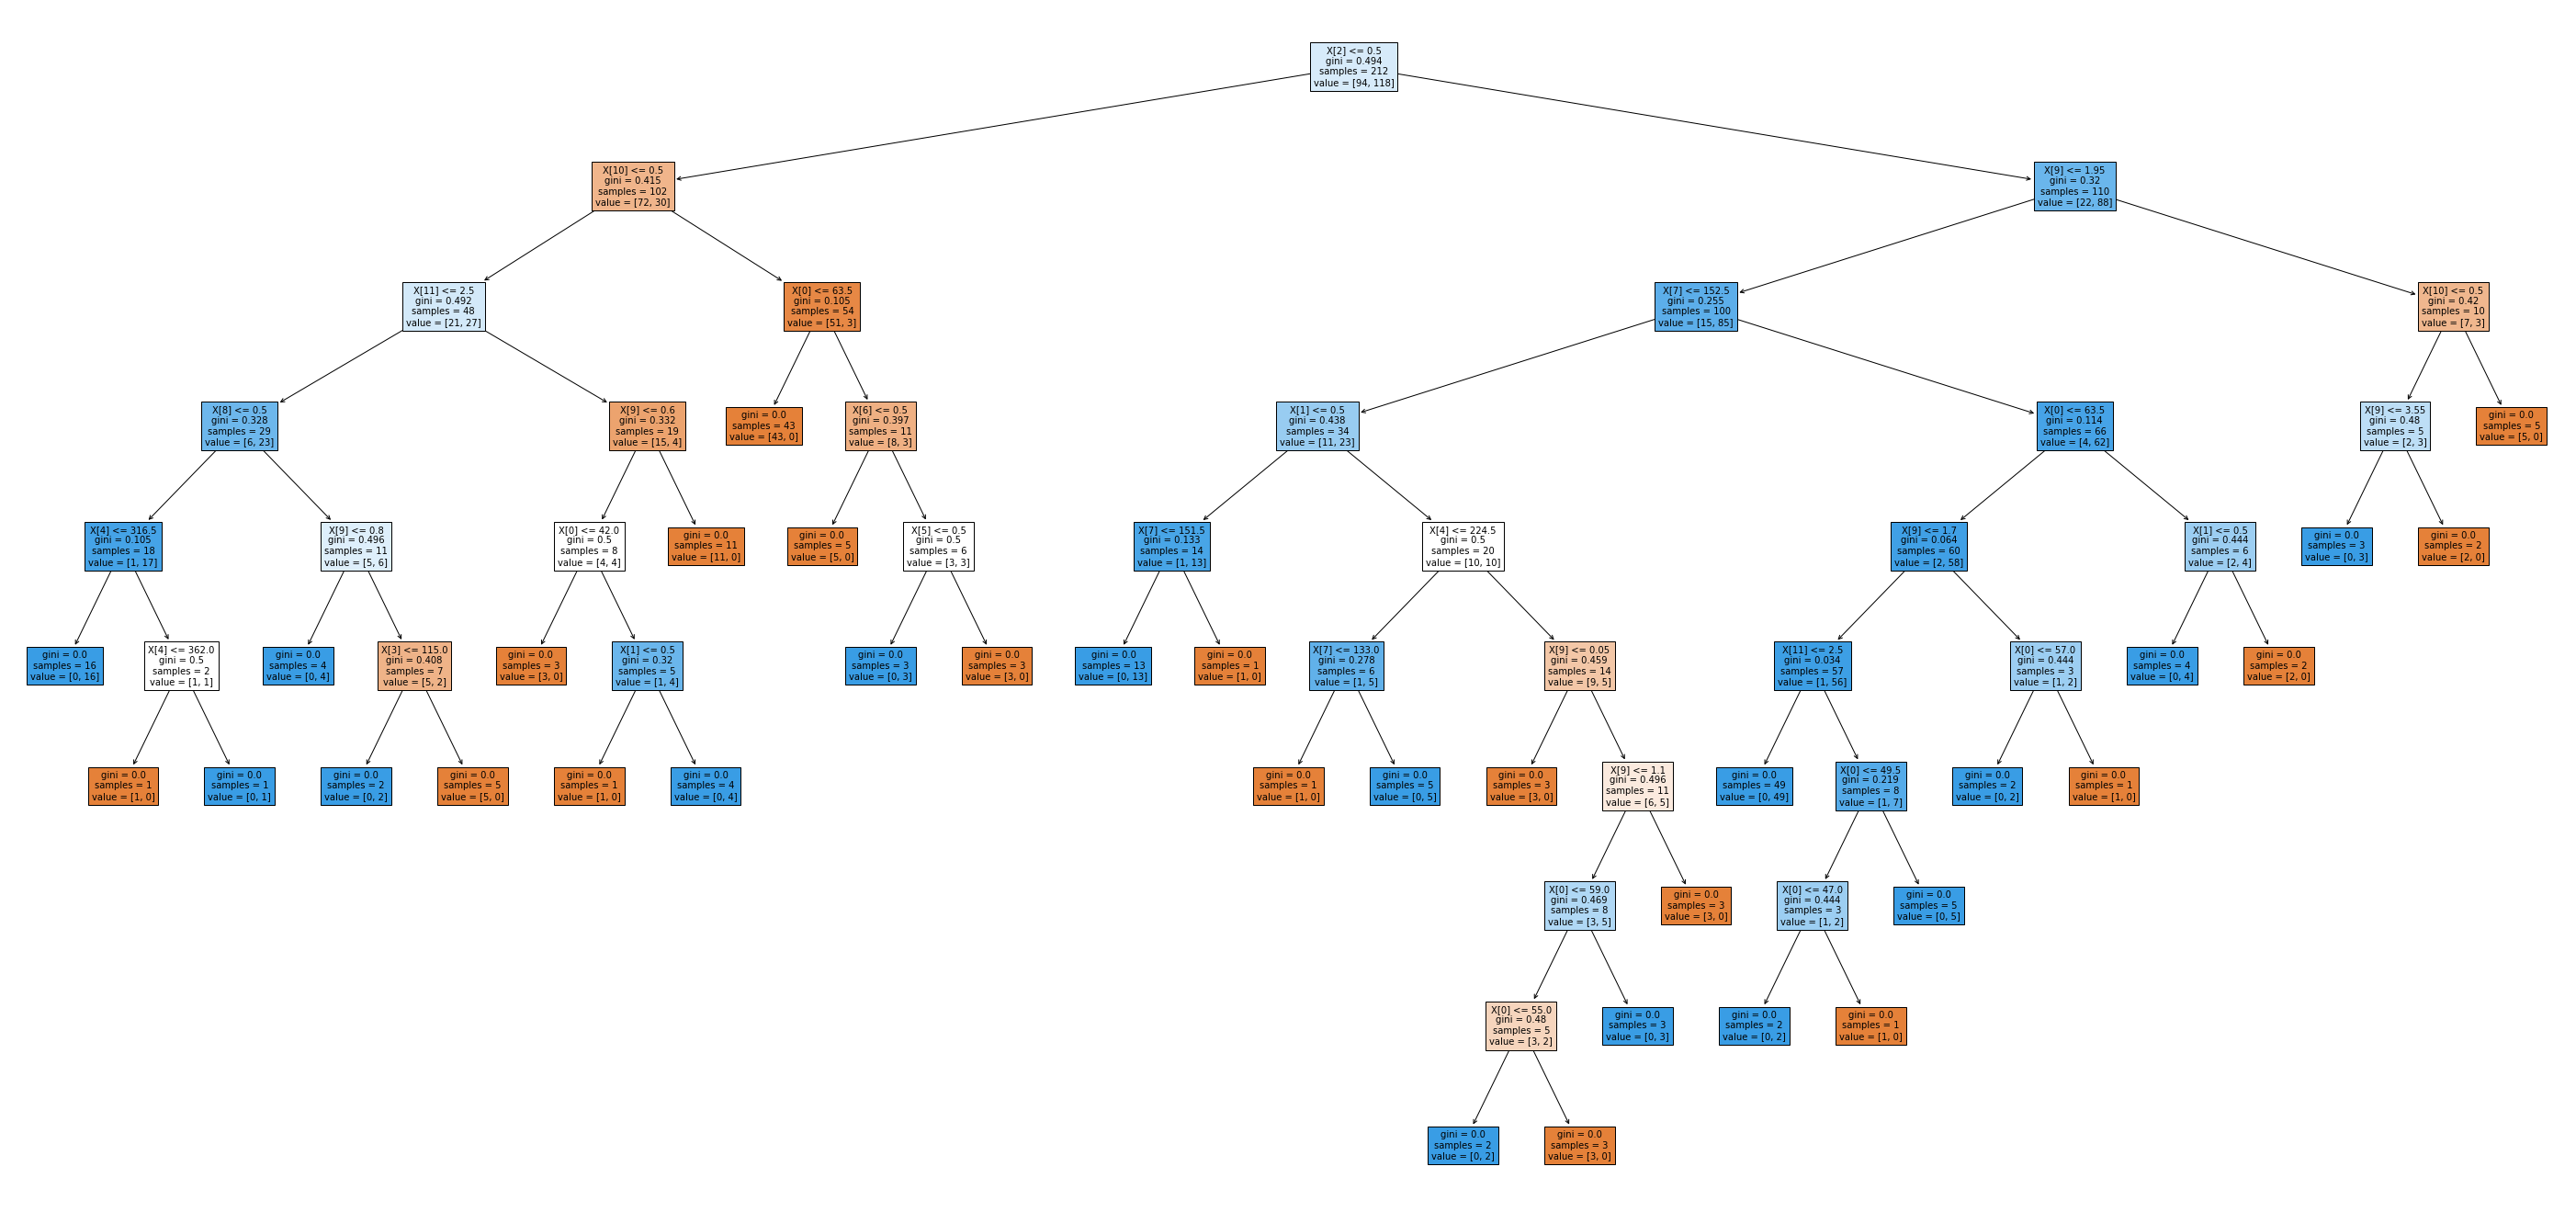

In [63]:
#Biểu diễn cây CART
plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

In [86]:
#Tạo mô hình với thuật tooán Naive Bayes
gnb = GaussianNB()

In [87]:
#Train mô hình và kiểm tra trên tập test
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [67]:
bayes_score= metrics.accuracy_score(y_test, bayes_pred)

In [68]:
print('Accuracy: ', bayes_score)
print('Report: ', metrics.classification_report(y_test, bayes_pred))

Accuracy:  0.8021978021978022
Report:                precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [94]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

In [95]:
bayes_cm

array([[32, 12],
       [ 6, 41]], dtype=int64)

Text(0.5, 1, 'Naive Bayes Accuracy Score: 0.8021978021978022')

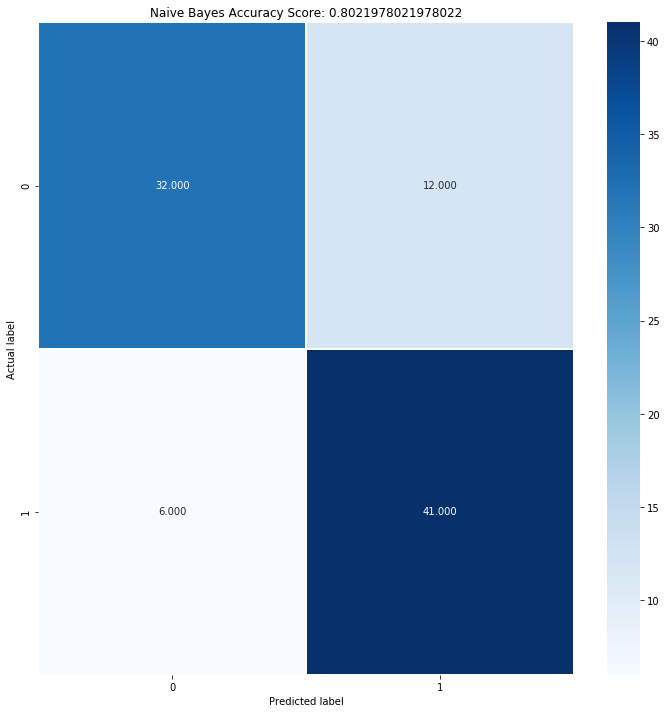

In [70]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt='.3f', linewidths=1, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title)